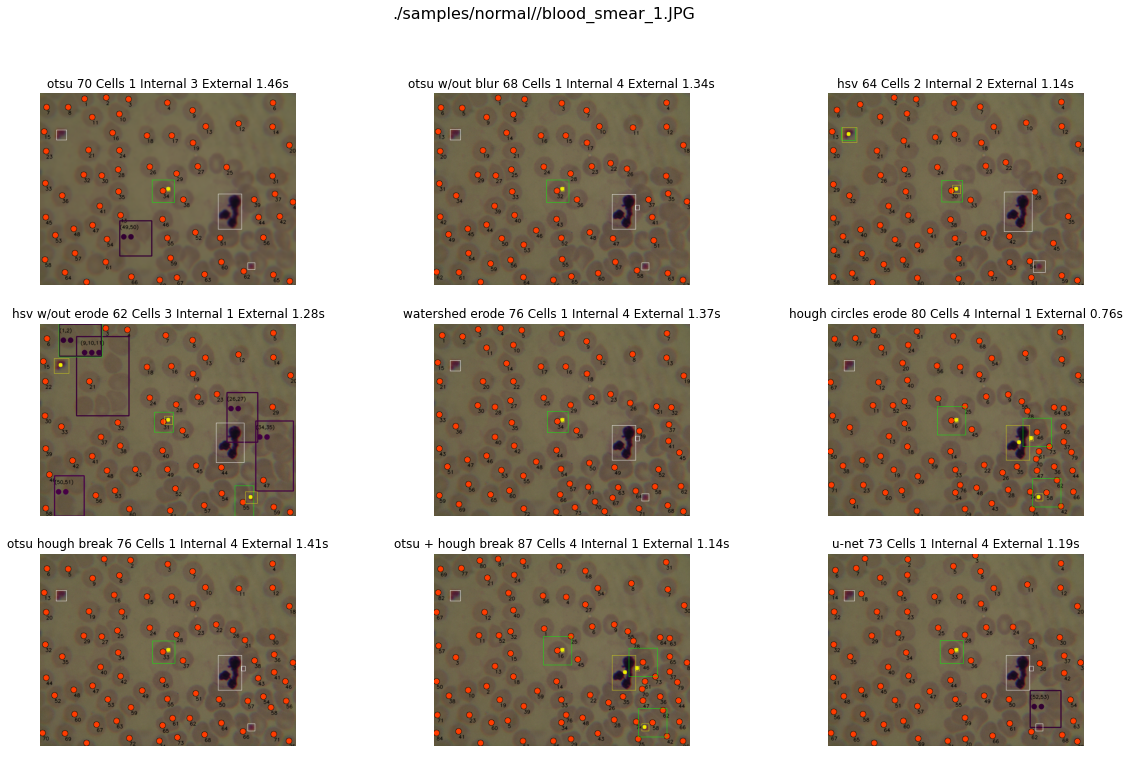

In [1]:
import os
import glob
#from ipynb.fs.full.cell_lib import *
#unet na validacao
#from ipynb.fs.full.cell_lib_unet_validation import *
#mascara unet no lugar do otsu
from ipynb.fs.full.cell_lib_unet_mask import *


NORMAL     = "./samples/normal/"
AGLOMERADO = "./samples/aglomerado/"

path = NORMAL + "/blood_smear_1.JPG"
#path = AGLOMERAD + "/blood_smear_8.JPG"

validation_type = 'unet'

def run_all(path,validation_type):
    
    fig, ax = plt.subplots(ncols=3,nrows=3,figsize=(20,12))
    
    images, stats = otsu_method(path,validation_type)
    ax[0,0].set_title("otsu %d Cells %d Internal %d External %s" % stats)
    ax[0,0].imshow(images[0])
    
    images, stats = otsu_method(path,validation_type, blur=False)
    ax[0,1].set_title("otsu w/out blur %d Cells %d Internal %d External %s" % stats)
    ax[0,1].imshow(images[0])

    images, stats = hsv_method(path,validation_type)
    ax[0,2].set_title("hsv %d Cells %d Internal %d External %s" % stats)
    ax[0,2].imshow(images[0])

    images, stats = hsv_method(path,validation_type, use_median_filter=False)
    ax[1,0].set_title("hsv w/out erode %d Cells %d Internal %d External %s" % stats)
    ax[1,0].imshow(images[0])

    images, stats = watershed_method(path,validation_type)
    ax[1,1].set_title("watershed erode %d Cells %d Internal %d External %s" % stats)
    ax[1,1].imshow(images[0])

    images, stats = hough_circles_method(path,validation_type)
    ax[1,2].set_title("hough circles erode %d Cells %d Internal %d External %s" % stats)
    ax[1,2].imshow(images[0])
    
    images, stats = otsu_hough_method(path,validation_type)
    ax[2,0].set_title("otsu hough break %d Cells %d Internal %d External %s" % stats)
    ax[2,0].imshow(images[0])
    
    images, stats = union_method(path,validation_type)
    ax[2,1].set_title("otsu + hough break %d Cells %d Internal %d External %s" % stats)
    ax[2,1].imshow(images[0])
    
    images, stats = unet_method(path,validation_type)
    ax[2,2].set_title("u-net %d Cells %d Internal %d External %s" % stats)
    ax[2,2].imshow(images[0])
    
    fig.suptitle(path, fontsize=16)
    
    plt.show()
    
run_all(path,validation_type)

Running: ./samples/normal/blood_smear_2.JPG


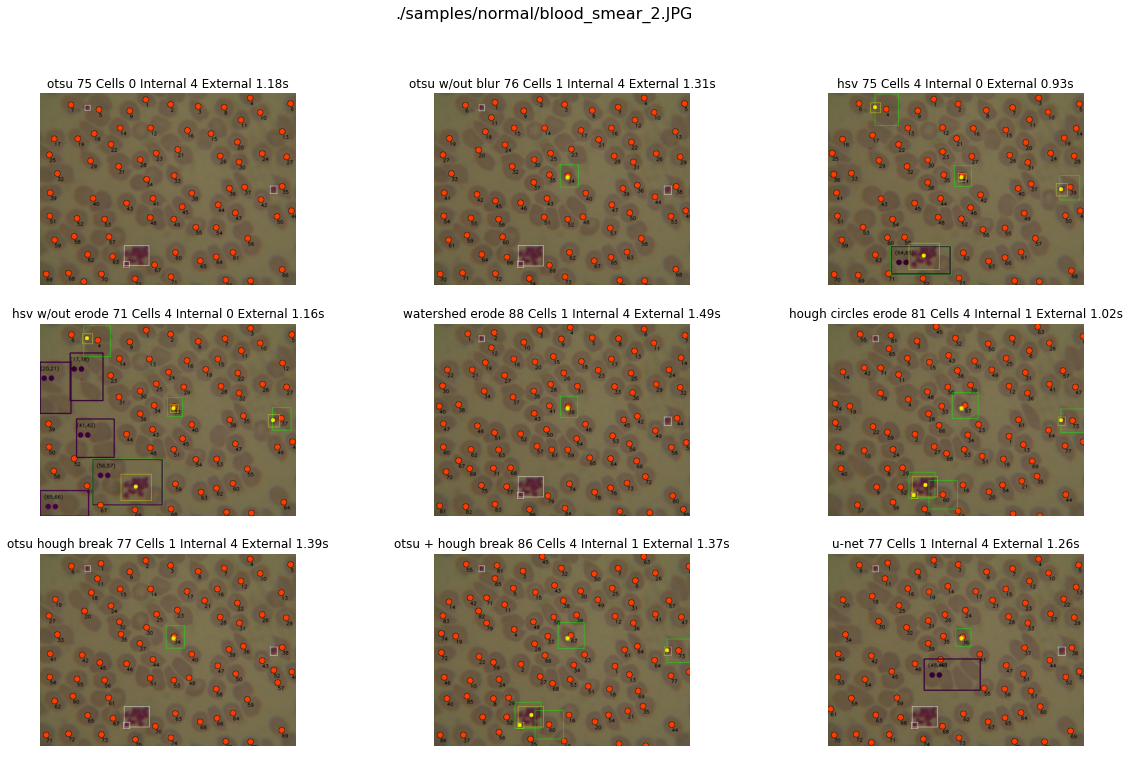

Running: ./samples/normal/blood_smear_3.JPG


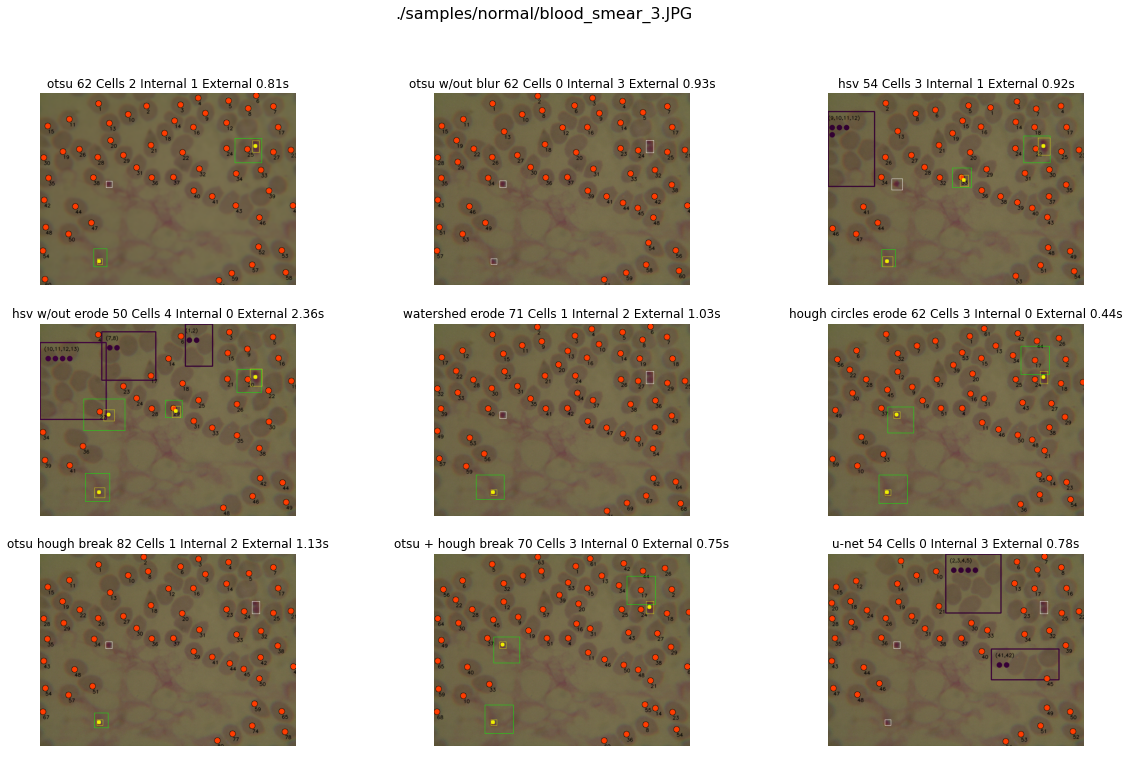

Running: ./samples/normal/blood_smear_4.JPG


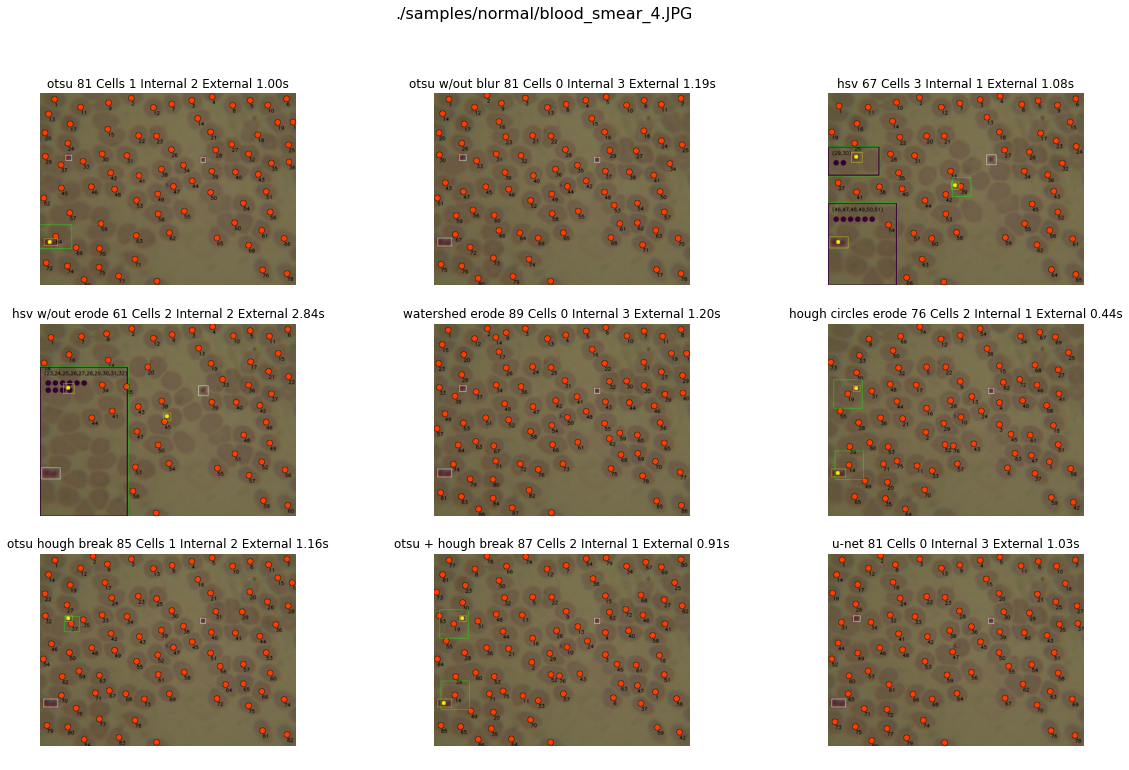

Running: ./samples/normal/blood_smear_5.JPG


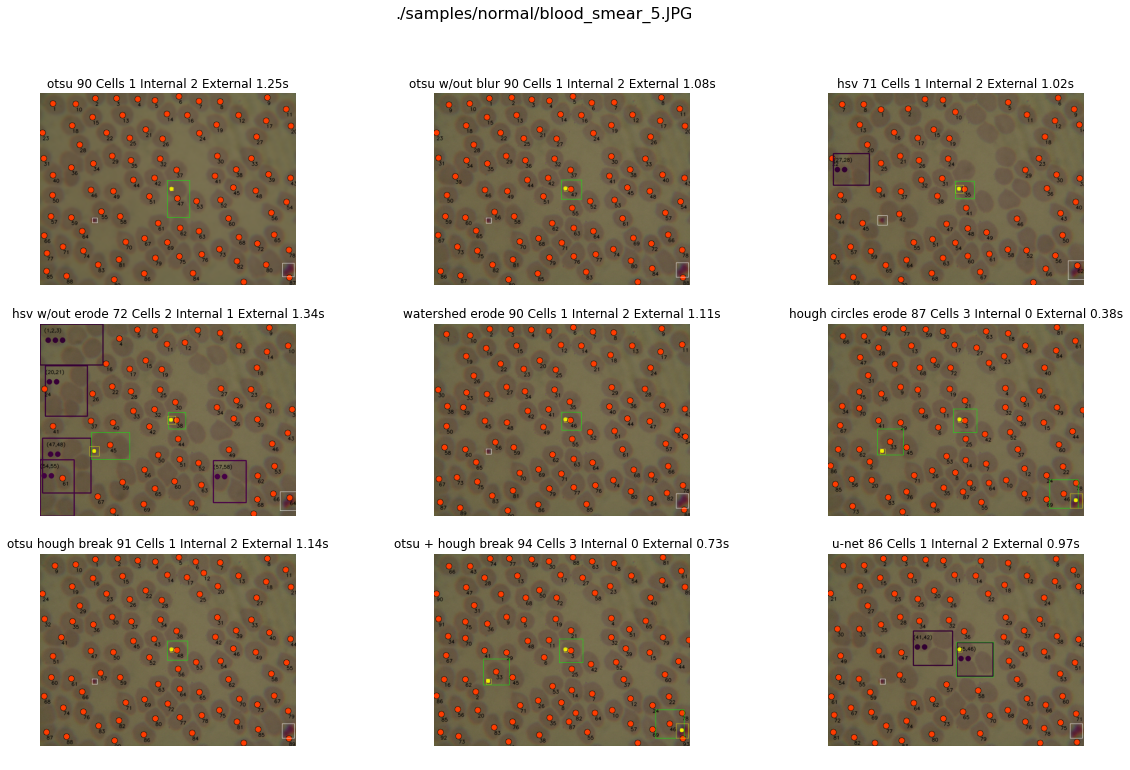

Running: ./samples/normal/blood_smear_6.JPG


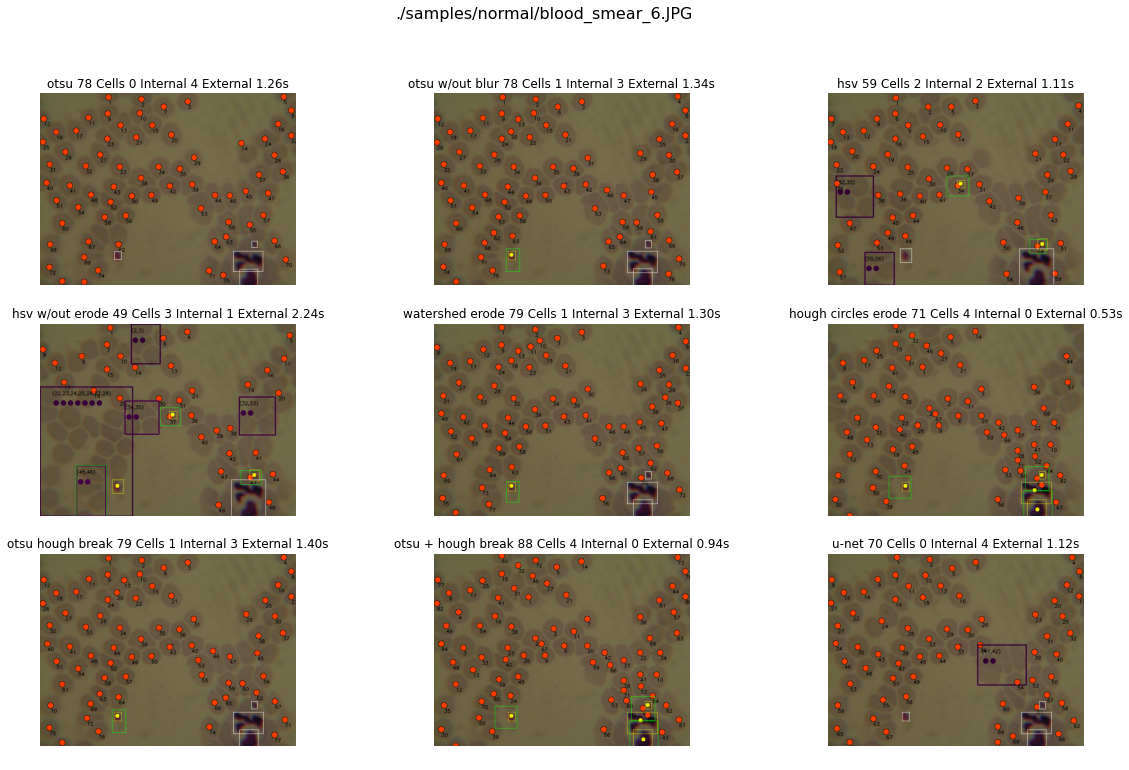

Running: ./samples/normal/blood_smear_7.JPG


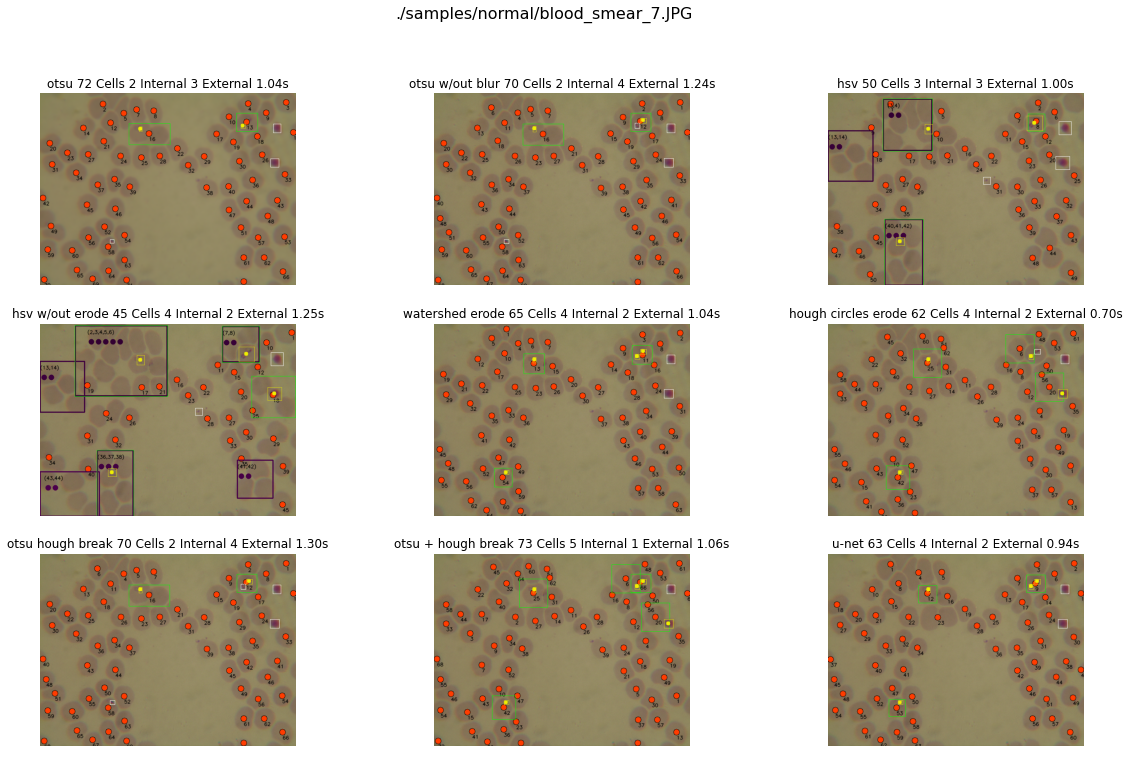

Running: ./samples/aglomerado/blood_smear_8.JPG


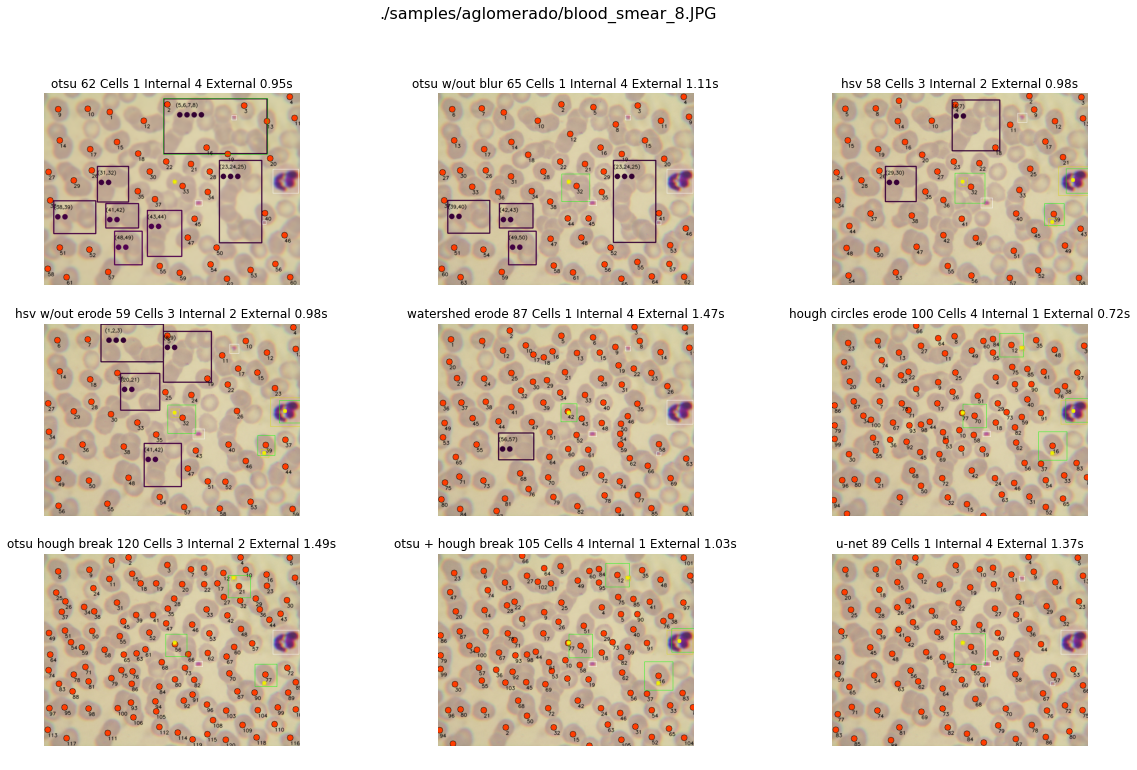

Running: ./samples/aglomerado/blood_smear_9.JPG


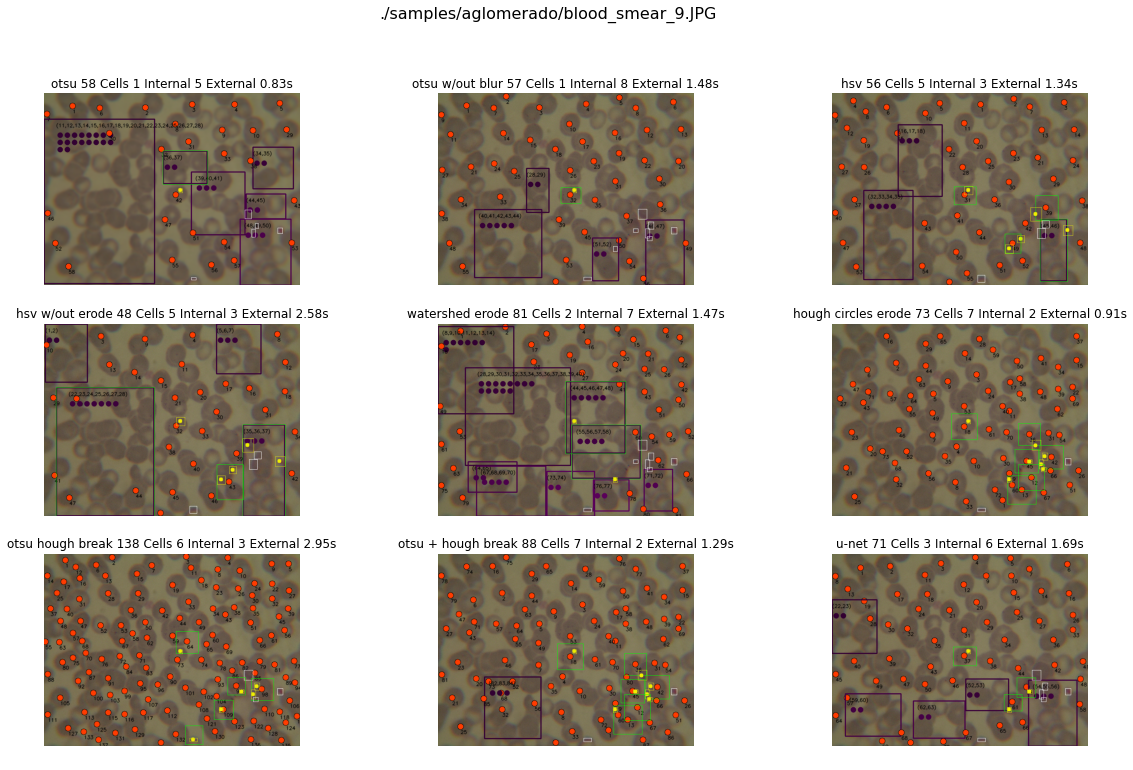

Running: ./samples/aglomerado/blood_smear_12.JPG


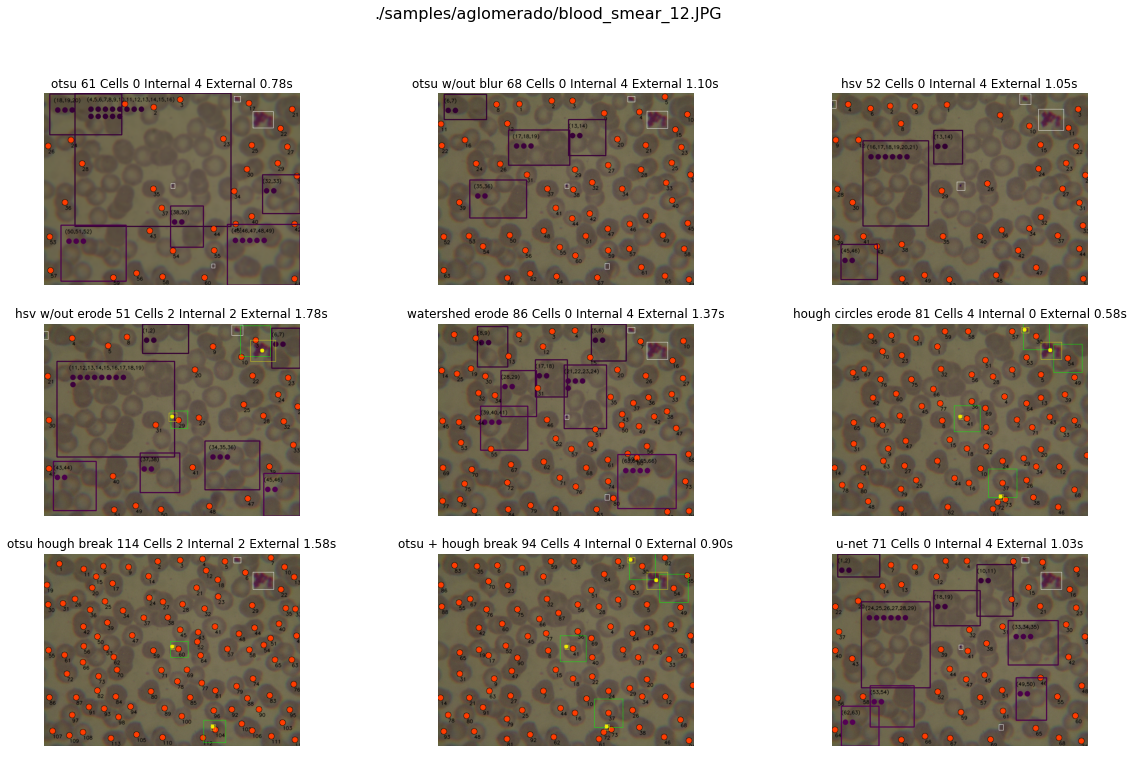

Running: ./samples/aglomerado/blood_smear_13.JPG


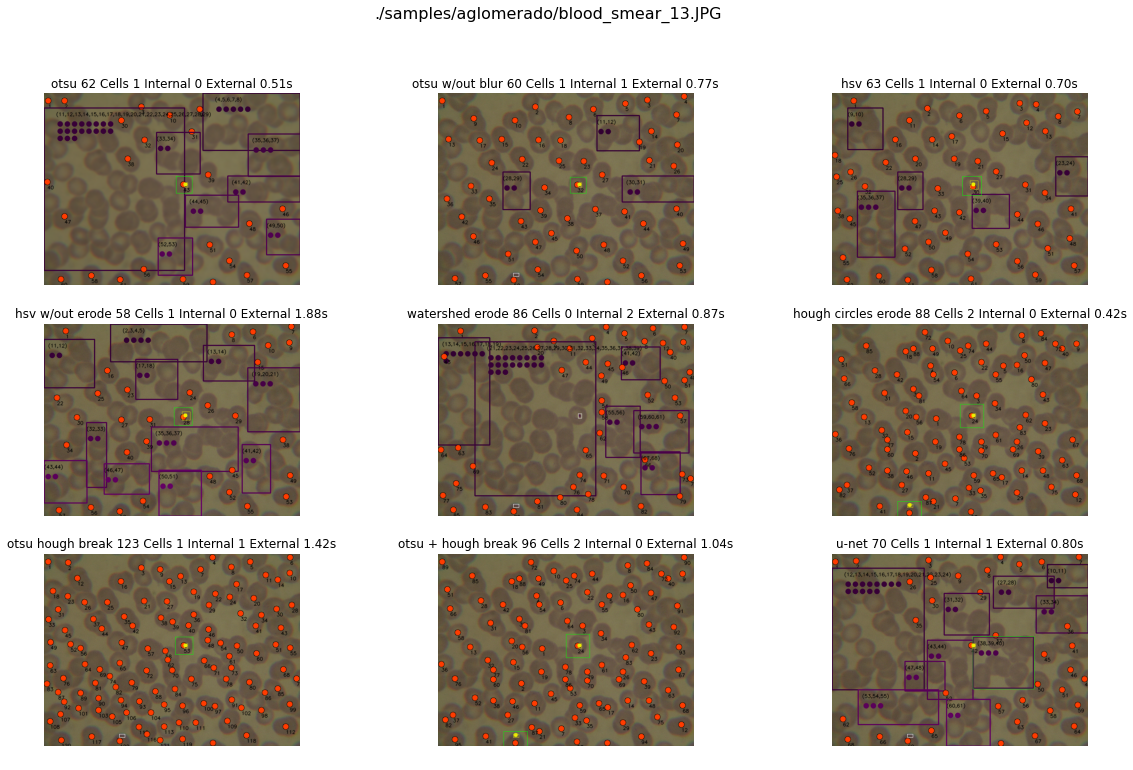

Running: ./samples/aglomerado/blood_smear_14.JPG


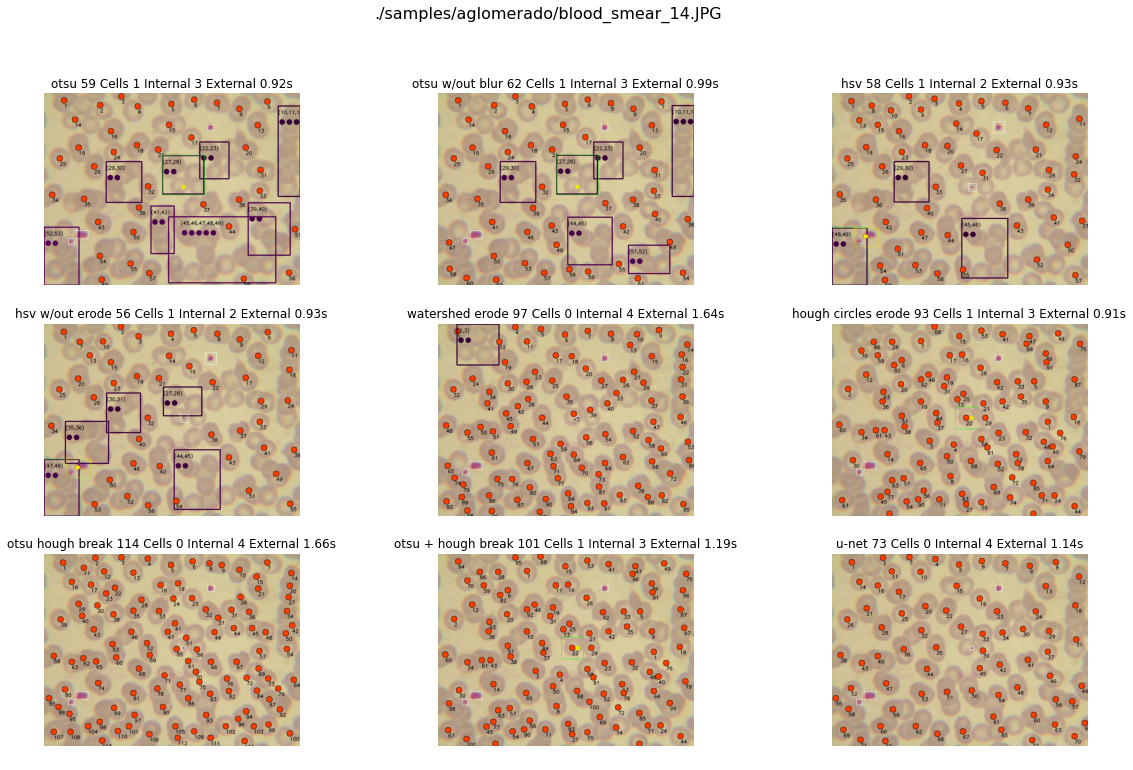

In [2]:
name = "./samples/normal/blood_smear_%d.JPG"
for i in range(2,16):
    path = name % i
    if os.path.exists(path):
        print("Running:",path)
        try:
            run_all(path,validation_type)
        except:
            print("error")
            
            
name = "./samples/aglomerado/blood_smear_%d.JPG"
for i in range(1,16):
    path = name % i
    if os.path.exists(path):
        print("Running:",path)
        try:
            run_all(path,validation_type)
        except:
            print("error")